<a href="https://colab.research.google.com/github/comrademaggie/randomstuff/blob/master/Unit_4_Lesson_3_Supervised_NN_MOMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [0]:
artworks = pd.read_csv('https://media.githubusercontent.com/media/MuseumofModernArt/collection/master/Artworks.csv')

In [0]:
artworks.columns

Index(['Title', 'Artist', 'ConstituentID', 'ArtistBio', 'Nationality',
       'BeginDate', 'EndDate', 'Gender', 'Date', 'Medium', 'Dimensions',
       'CreditLine', 'AccessionNumber', 'Classification', 'Department',
       'DateAcquired', 'Cataloged', 'ObjectID', 'URL', 'ThumbnailURL',
       'Circumference (cm)', 'Depth (cm)', 'Diameter (cm)', 'Height (cm)',
       'Length (cm)', 'Weight (kg)', 'Width (cm)', 'Seat Height (cm)',
       'Duration (sec.)'],
      dtype='object')

In [0]:
artworks.head()

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
0,"Ferdinandsbrücke Project, Vienna, Austria, Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),(Male),1896,Ink and cut-and-pasted painted pages on paper,...,http://www.moma.org/media/W1siZiIsIjU5NDA1Il0s...,NaN,NaN,NaN,48.6000,NaN,NaN,168.9000,NaN,NaN
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",(French),(1944),(0),(Male),1987,Paint and colored pencil on print,...,http://www.moma.org/media/W1siZiIsIjk3Il0sWyJw...,NaN,NaN,NaN,40.6401,NaN,NaN,29.8451,NaN,NaN
2,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, pen, color pencil, ink, and gouache ...",...,http://www.moma.org/media/W1siZiIsIjk4Il0sWyJw...,NaN,NaN,NaN,34.3000,NaN,NaN,31.8000,NaN,NaN
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(Male),1980,Photographic reproduction with colored synthet...,...,http://www.moma.org/media/W1siZiIsIjEyNCJdLFsi...,NaN,NaN,NaN,50.8000,NaN,NaN,50.8000,NaN,NaN
4,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, color pencil, ink, and gouache on tr...",...,http://www.moma.org/media/W1siZiIsIjEyNiJdLFsi...,NaN,NaN,NaN,38.4000,NaN,NaN,19.1000,NaN,NaN


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


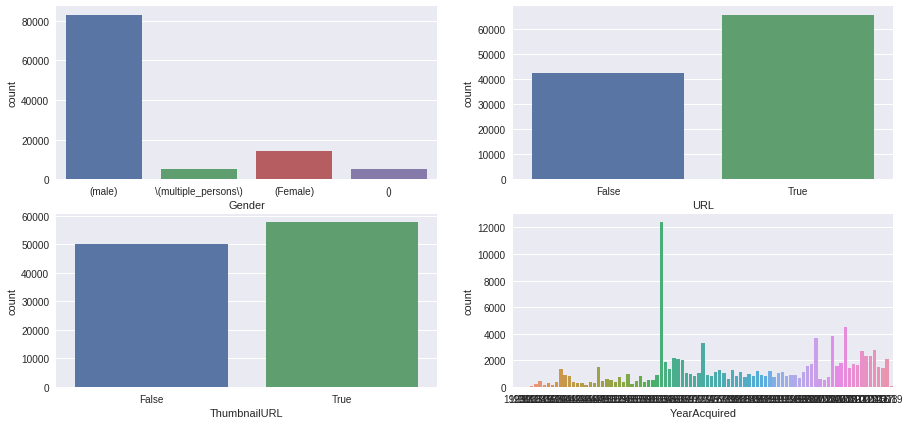

In [0]:
fig, ax = plt.subplots(2,2,figsize=(15,7))
plt.subplot(2,2,1)
sns.countplot(artworks.Gender)

plt.subplot(2,2,2)
sns.countplot(artworks.URL)

plt.subplot(2,2,3)
sns.countplot(artworks.ThumbnailURL)

plt.subplot(2,2,4)
sns.countplot(artworks.YearAcquired)


In [0]:
artworks.groupby('Department').count()[['Title']]

,Title
Department,
Architecture & Design,19515
Architecture & Design - Image Archive,28
Drawings & Prints,74793
Film,4021
Fluxus Collection,1999
Media and Performance,2793
Painting & Sculpture,3872
Photography,30690


In [0]:
artworks.groupby('Artist').count()[['Title']].describe()

,Title
count,14467.000000
mean,9.411903
std,70.235638
min,0.000000
25%,1.000000
50%,1.000000
75%,4.000000
max,5050.000000


In [0]:
#only 3,256 artists make up 119,423 of the collection, or 87% of the data
artist_df = artworks.groupby('Artist').count()[['Title']]
count_artists = artist_df.loc[artist_df.Title>4].count()
collection_artists = artist_df.loc[artist_df.Title>4].sum()
perc_collection = collection_artists/artworks.Title.count()*100

print('{}% of total MOMA collection comes from {} artists'.format(round(perc_collection[-1],2), count_artists[-1]))


86.8% of total MOMA collection comes from 3257 artists


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

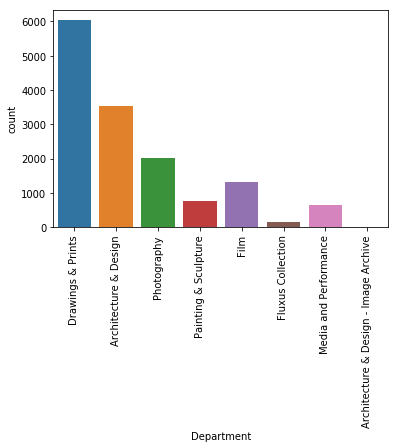

In [0]:
#confirming we can drop artists with less than 4 titles as their artworks are distributed across all departments and not concentrated in a single one
artists_few = artist_df.loc[artist_df.Title<4]
artist_four_department = pd.merge(artists_few, artworks[['Artist', 'Department']], on='Artist', how='left')
sns.countplot(artist_four_department['Department'])
plt.xticks(rotation='vertical')

In [0]:
artworks.groupby('Artist').count()[['YearAcquired']].sort_values(by='YearAcquired', ascending=False).head(10)

,YearAcquired
Artist,
Multiple_Artists,5706
Louise Bourgeois,3230
Unknown photographer,2127
Lee Friedlander,1316
Pablo Picasso,1295
Marc Chagall,1151
Henri Matisse,1041
Jean Dubuffet,1021
Ludwig Mies van der Rohe,936


In [0]:
artworks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137643 entries, 0 to 137642
Data columns (total 29 columns):
Title                 137604 non-null object
Artist                136176 non-null object
ConstituentID         136176 non-null object
ArtistBio             132081 non-null object
Nationality           136176 non-null object
BeginDate             136176 non-null object
EndDate               136176 non-null object
Gender                136176 non-null object
Date                  135231 non-null object
Medium                126604 non-null object
Dimensions            126629 non-null object
CreditLine            134763 non-null object
AccessionNumber       137643 non-null object
Classification        137643 non-null object
Department            137643 non-null object
DateAcquired          130796 non-null object
Cataloged             137643 non-null object
ObjectID              137643 non-null int64
URL                   79296 non-null object
ThumbnailURL          68682 non-null

In [0]:
# Select Columns.
artworks = artworks[['Artist', 'Nationality', 'Gender', 'Date', 'Department',
                    'DateAcquired', 'URL', 'ThumbnailURL', 'Height (cm)', 'Width (cm)']]

# Convert URL's to booleans.
artworks['URL'] = artworks['URL'].notnull()
artworks['ThumbnailURL'] = artworks['ThumbnailURL'].notnull()

# Drop films and some other tricky rows.
artworks = artworks[artworks['Department']!='Film']
artworks = artworks[artworks['Department']!='Media and Performance Art']
artworks = artworks[artworks['Department']!='Fluxus Collection']

# Drop missing data.
artworks = artworks.dropna()

In [0]:
#Converting DateAcquired column from object to datetime object and adding feature for acquisition year
artworks['DateAcquired'] = pd.to_datetime(artworks.DateAcquired)
artworks['YearAcquired'] = artworks.DateAcquired.dt.year
artworks['YearAcquired'].dtype

dtype('int64')

In [0]:
artworks.head()

,Artist,Nationality,Gender,Date,Department,DateAcquired,URL,ThumbnailURL,Height (cm),Width (cm),YearAcquired
0,Otto Wagner,(Austrian),(Male),1896,Architecture & Design,1996-04-09,True,True,48.6000,168.9000,1996
1,Christian de Portzamparc,(French),(Male),1987,Architecture & Design,1995-01-17,True,True,40.6401,29.8451,1995
2,Emil Hoppe,(Austrian),(Male),1903,Architecture & Design,1997-01-15,True,True,34.3000,31.8000,1997
3,Bernard Tschumi,(),(Male),1980,Architecture & Design,1995-01-17,True,True,50.8000,50.8000,1995
4,Emil Hoppe,(Austrian),(Male),1903,Architecture & Design,1997-01-15,True,True,38.4000,19.1000,1997


In [0]:
#remove multiple genders, clean up duplicate category for male
artworks.loc[artworks['Gender'].str.contains('\) \('), 'Gender'] = '\(multiple_persons\)'
artworks['Gender'] = artworks['Gender'].str.replace('Male', 'male')

In [0]:

empty_natl = artworks.loc[artworks['Nationality']=='()']
empty_natl.groupby('Artist').count()[['YearAcquired']].sort_values(by='YearAcquired',ascending=False)

,YearAcquired
Artist,
Unknown photographer,2127
Unknown Artists,201
Russian Book Collection,89
Bernard Tschumi,61
Various Artists,49
Destroy All Monsters,48
unknown,26
Associated Press,20
"Department of Publications and Urban Design, Organizing Committee of the XIX Olympiad",18


In [0]:
#where artists include multiple nationalities, set as 'multiple nationalities'
artworks.loc[artworks['Nationality'].str.contains('\) \('), 'Nationality'] = '\(multiple_nationalities\)'
# artworks = artworks.loc[artworks['Nationality']!='()']

In [0]:
#where there are multiple artists, set as 'multiple artists'
artworks.loc[artworks['Artist'].str.contains(','), 'Artist'] = 'Multiple_Artists'

In [0]:
#create new feature of height x width
artworks['HxW']=artworks['Height (cm)']*artworks['Width (cm)']
artworks[['Height (cm)','Width (cm)', 'HxW']].sort_values(by='HxW', ascending=False).head()

,Height (cm),Width (cm),HxW
33742,1097.3000,9144.0000,1.003371e+07
124197,5000.0000,1200.0000,6.000000e+06
87585,9140.0000,200.0000,1.828000e+06
86892,228.6005,4663.4493,1.066067e+06
75300,1000.8000,1000.8000,1.001601e+06


{'boxes': [<matplotlib.lines.Line2D at 0x7f63c8070fd0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f63c8069828>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f63c805f240>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f63c8069eb8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f63c8069198>,
  <matplotlib.lines.Line2D at 0x7f63c80694e0>]}

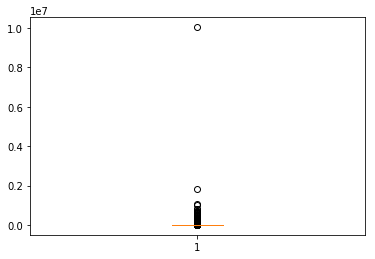

In [0]:
plt.boxplot(artworks.HxW)

In [0]:
artworks['HxW'].describe()
#mean is 280, std is 33570, min is 0, 25% of data is less than 340, 50% less than 698, 75% less than 1851, max is 10033710

count    1.079010e+05
mean     2.797526e+03
std      3.357034e+04
min      0.000000e+00
25%      3.399800e+02
50%      6.984500e+02
75%      1.851040e+03
max      1.003371e+07
Name: HxW, dtype: float64

In [0]:
#filter out the outlier of HxW
artworks = artworks.loc[artworks['HxW']!=artworks['HxW'].max()]

In [0]:
#get descriptive stats on HxW
artworks.HxW.describe()

count    1.079000e+05
mean     2.704561e+03
std      1.394409e+04
min      0.000000e+00
25%      3.399776e+02
50%      6.984500e+02
75%      1.850898e+03
max      1.828000e+06
Name: HxW, dtype: float64

In [0]:
#categorize the size of the artwork into small, medium, large, very large. cutoff points are taking from interquartile ranges above

#Binning:
def binning(col, cut_points, labels=None):
  #Define min and max values:
  minval = col.min()
  maxval = col.max()

  #create list by adding min and max to cut_points
  break_points = [minval] + cut_points + [maxval]

  #if no labels provided, use default labels 0 ... (n-1)
  if not labels:
    labels = range(len(cut_points)+1)

  #Binning using cut function of pandas
  colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
  return colBin

#Binning age:
cut_points = [340,690,1850]
labels = ["small","medium","large","very large"]
artworks["size"] = binning(artworks["HxW"], cut_points, labels)
print(pd.value_counts(artworks["size"], sort=False))

small         27048
medium        26482
large         27551
very large    27047
Name: size, dtype: int64


In [0]:
# Convert dates to start date, cutting down number of distinct examples.
artworks['Date'] = pd.Series(artworks.Date.str.extract(
    '([0-9]{4})', expand=False))[:-1]


In [0]:
artworks.head()

,Artist,Nationality,Gender,Date,Department,DateAcquired,URL,ThumbnailURL,Height (cm),Width (cm),YearAcquired,HxW,size
0,Otto Wagner,(Austrian),(male),1896,Architecture & Design,1996-04-09,True,True,48.6000,168.9000,1996,8208.540000,very large
1,Christian de Portzamparc,(French),(male),1987,Architecture & Design,1995-01-17,True,True,40.6401,29.8451,1995,1212.907849,large
2,Emil Hoppe,(Austrian),(male),1903,Architecture & Design,1997-01-15,True,True,34.3000,31.8000,1997,1090.740000,large
3,Bernard Tschumi,(),(male),1980,Architecture & Design,1995-01-17,True,True,50.8000,50.8000,1995,2580.640000,very large
4,Emil Hoppe,(Austrian),(male),1903,Architecture & Design,1997-01-15,True,True,38.4000,19.1000,1997,733.440000,large


In [0]:
unique_dates, unique_year_acq, unique_artist, unique_nationality = artworks.Date.nunique(), artworks.YearAcquired.nunique(), artworks.Artist.nunique(), artworks.Nationality.nunique()
print('unique_dates: {}, unique_year_acq: {}, unique_artist: {}, unique_nationality: {}'.format(unique_dates, unique_year_acq, unique_artist, unique_nationality))

unique_dates: 198, unique_year_acq: 91, unique_artist: 9365, unique_nationality: 110


In [0]:
#filter out long tail of artists who contribute less than 4 works to the collection
groupby_artist = artworks.groupby('Artist').filter(lambda x: x.DateAcquired.count()>4)

groupby_artist = groupby_artist.dropna()

groupby_artist.Artist.nunique()

2544

In [0]:
X=groupby_artist.drop(['Department', 'DateAcquired','Height (cm)', 'Width (cm)', 'HxW'], 1)
Y=groupby_artist['Department']
X.shape, Y.shape

((96559, 8), (96559,))

In [0]:
#MOMA acquired mainly Drawings and Prints in 1964. This is outlier behavior?
artworks_1964=artworks.loc[artworks.YearAcquired==1964]
artworks_1964.groupby('Department').count()[['Artist']].sort_values(by='Artist', ascending=False)


,Artist
Department,
Drawings & Prints,11720
Photography,553
Architecture & Design,77
Painting & Sculpture,58


In [0]:
X = pd.get_dummies(X, sparse=True)
X.shape, Y.shape

((96559, 2821), (96559,))

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((67591, 2821), (67591,), (28968, 2821), (28968,))

In [0]:
#import model
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

#instantiate model
mlp = MLPClassifier(max_iter=100)

#define parameters
parameter_space = {
    'hidden_layer_sizes': [(50,), (100,)]}


clf = GridSearchCV(mlp, parameter_space, cv=3)

clf.fit(X_train, y_train)



GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'hidden_layer_sizes': [(50,), (100,)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [0]:
# Best parameter set
print('Best parameters found:', clf.best_params_)
print('Best score:', clf.best_score_)
print('All scores:', clf.cv_results_)



Best parameters found: {'hidden_layer_sizes': (50,)}
Best score: 0.9356804333107651
All scores: {'mean_fit_time': array([241.86193268, 192.44310212]), 'std_fit_time': array([93.27358819,  4.67493478]), 'mean_score_time': array([3.13553389, 3.3248082 ]), 'std_score_time': array([0.04484627, 0.04963494]), 'param_hidden_layer_sizes': masked_array(data=[(50,), (100,)],
             mask=[False, False],
       fill_value='?',
            dtype=object), 'params': [{'hidden_layer_sizes': (50,)}, {'hidden_layer_sizes': (100,)}], 'split0_test_score': array([0.94061548, 0.9303722 ]), 'split1_test_score': array([0.93416347, 0.93389853]), 'split2_test_score': array([0.93226177, 0.93866466]), 'mean_test_score': array([0.93568043, 0.93431162]), 'std_test_score': array([0.00357511, 0.00339797]), 'rank_test_score': array([1, 2], dtype=int32), 'split0_train_score': array([0.95065463, 0.9374517 ]), 'split1_train_score': array([0.93906612, 0.94407771]), 'split2_train_score': array([0.94756711, 0.94973066

In [0]:
from sklearn.neural_network import MLPClassifier
#instantiate final mlp model
mlp = MLPClassifier(max_iter=100, hidden_layer_sizes = (50,))


mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)



ValueError: ignored

In [0]:
print('MLP Train score:', mlp.score(X_train, y_train))
print('MLP Test score:', mlp.score(X_test, y_test))

MLP Train score: 0.9475287745429926
MLP Test score: 0.9402774915859605


In [0]:
Y.value_counts()/len(Y)

In [0]:
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV

# Initialize and fit the Gradient Boosting Classifier model

param_test1 = {'n_estimators':[40,70,100]}
gsearch1 = GridSearchCV(estimator = ensemble.GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='accuracy', cv=3)
gsearch1.fit(X_train, y_train)


ValueError: ignored

In [0]:
gsearch1.cv_results_['mean_train_score'], gsearch1.best_params_, gsearch1.best_score_

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


(array([0.75794801, 0.77874503, 0.78416145]),
 {'n_estimators': 100},
 0.7821965794354008)

In [0]:

from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print(rfc.score(X_test, y_test))

0.9445940347970174


## Conclusion
Including artists as a feature drastically improves the performance of our models.  For MLP specifically, accuracy goes up from 68% to 94%.  This makes a lot of sense as who the artist is should be very informative in the medium that they work in, and thus the department that the artwork would be classified in.
<br>
<br>
Random Forest model performs very well (93% accuracy, 94% weighted F1 score) and very fast.  Gradient Boosting surprisingly did not perform as well, with an accuracy of 78%.  We could probably spend a lot more time tuning the parameters to achieve a better score.  The MLP model performed best at 95% accuracy and 94% weighted F1 score, but was excessively slow.  Even with a single hidden layer of 50 neurons, smaller than the default of 100, and a reduced number of iterations (100 instead of 200), fitting the model was painfully slow.  Adding a layer was out of the question, as was parameter tuning.  Thus, unless you have a lot of computational resources to expend, I would sacrifice a few percentage points of accuracy for a faster model, aka Random forest. 